# **Assignment 1**

This assignment was completed by Frederik Baj Henriksen (s194645@dtu.dk), Anna Olivia McFall (s184307@dtu.dk), and Jacob Valentin Hoffmann (s243569@dtu.dk)

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. We provide solutions to the exercises with the following titles from **Part 1**

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook* [link text](https://)

*Answer:*

*1. What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*

According to Section 3.5, the primary problem is the degree distribution. Random networks typically predict a Poisson-like distribution where most node degrees are narrowly clustered around the average degree (⟨k⟩). This model lacks outliers and fails to account for the existence and "severity" of high-degree nodes and low-degree nodes (hubs) that are commonly observed in real-world networks.

*2. List the four regimes that characterize random networks as a function of ⟨k⟩.*

As of Section 3.6, The four regimes that characterize random networks as a function of the average degree ⟨k⟩ are:

* Subcritical Regime (0 < ⟨k⟩ < 1): The network consists of numerous small, isolated components whose size follow an exponential distribution. No giant component exists because the existing nodes have on average less than one link, meaning that there are no loops or cycles and the nodes are linked as trees.

* Critical Point (⟨k⟩ = 1): In the Critical Point, all nodes have on average one link, which as a result acts as a threshold / trigger for the emergence of a giant component in the network. Most nodes still exist in smaller components linked as trees.

* Supercritical Regime (⟨k⟩ > 1): A giant component containing a finite fraction of the nodes emerges and coexists with many smaller, isolated components. The small components are linked as trees, while the giant component contains both loops and cycles.

Connected Regime (⟨k⟩ > lnN): The giant component absorbs all nodes, and the network becomes fully connected. The complete network is usually relatively sparse with ⟨k⟩ = N-1 and the average degree of a node depending on the number of nodes N.

*3. According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?*

This is a problem because the random network model makes a prediction that is directly contradicted by empirical evidence. According to Section 3.9, the model predicts that the local clustering coefficient (Ci) of a node is independent of its degree. However, in real-world networks, the degree-dependent clustering C(k) is observed to systematically decrease as the degree k increases. The random network model completely fails to capture this fundamental structural property. In fact, random networks are not accurate representations of most real-world systems. Rather, they are typically used as a baseline for comparison, helping to identify which patterns and behaviours may be purely by chance. When the features of a real system resemble those of a random network, it suggests that the observation is likely random.

* *WS edition*



*Answer:*

1. *First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probability p=0, 0.1, and 1. Calculate the average shortest path length ⟨d⟩ for each one.*

In [1]:
import networkx as nx
import numpy as np

# Parameters
N = 500  # Number of nodes
k = 4    # Average degree
p_values = [0, 0.1, 1]

# Generate graphs and calculate path lengths
for p in p_values:
    # Generate the Watts-Strogatz graph
    G = nx.watts_strogatz_graph(n=N, k=k, p=p, seed=42)

    # Calculate the average shortest path length
    avg_d = nx.average_shortest_path_length(G)

    print(f"For p = {p}:")
    print(f"  Average shortest path length <d> = {avg_d:.4f}\n")

For p = 0:
  Average shortest path length <d> = 62.8758

For p = 0.1:
  Average shortest path length <d> = 8.3409

For p = 1:
  Average shortest path length <d> = 4.7268



For a regular lattice (p=0), the average shortest path length is very long: ⟨d⟩ = 62.8758.
With only 10% of edges rewired (p=0.1), the path length drops dramatically to ⟨d⟩ = 8.3409.
For a fully random network (p=1), the path length is shortest: ⟨d⟩ = 4.7268.
This calculation confirms the core principle of the small-world model: introducing a small amount of randomness drastically reduces the average distance between nodes.

2. *Describe what happens to the network when p=1.*
When the rewiring probability p=1, every edge of the initial regular ring lattice is rewired to a new, randomly chosen node. This process completely randomizes the network's structure, transforming it from an ordered lattice into a random network. The resulting graph is structurally equivalent to an Erdős-Rényi (ER) random graph with a fixed number of nodes and edges, exhibiting a Poisson-like degree distribution, very low clustering, and a short average path length.This randomization results in the shortest possible average path length for a network of this size and density, which our results show to be ⟨d⟩ ≈ 4.73.

3. *Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.*
The average shortest path length drops dramatically and approaches the value of a fully randomized network for a very small p. Based on the results from both the provided text (Image 3.14) and experimentation, this transition occurs for p values in the range of 0.01 to 0.1. Even with only 1% of links rewired (p=0.01), the network gains random "shortcuts" that significantly reduce the average distance between nodes, demonstrating the onset of the small-world phenomenon.

4. *Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.*

Running simulation for p = 0...
Running simulation for p = 0.01...
Running simulation for p = 0.03...
Running simulation for p = 0.05...
Running simulation for p = 0.1...
Running simulation for p = 0.2...


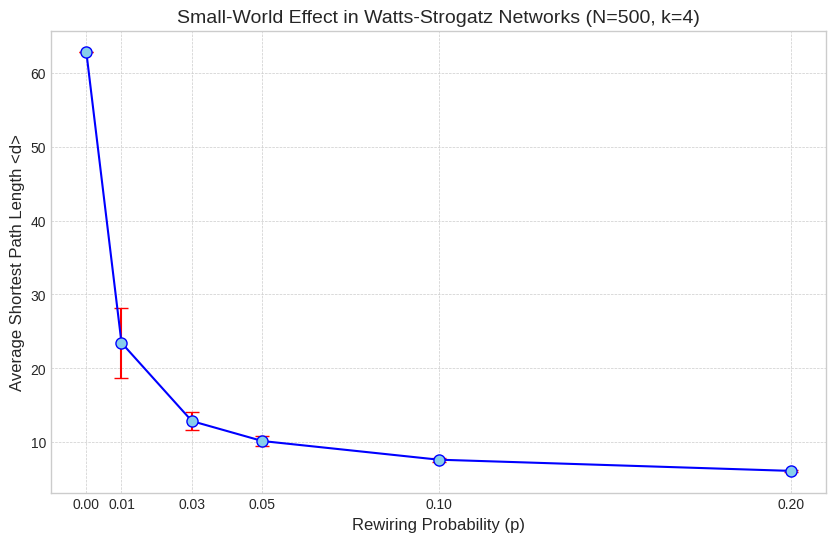

In [2]:
import matplotlib.pyplot as plt

# Parameters
N = 500
k = 4
p_values_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

# Data Storage
avg_path_lengths = []
std_devs = []

# Main Loop for Simulation
for p in p_values_detailed:
    path_lengths_for_p = []
    print(f"Running simulation for p = {p}...")
    for i in range(num_networks):
        # Generate the graph
        G = nx.watts_strogatz_graph(n=N, k=k, p=p)

        # We calculate it on the largest connected component as a robust measure.
        if not nx.is_connected(G):
            # Get the largest connected component subgraph
            largest_cc = max(nx.connected_components(G), key=len)
            G_cc = G.subgraph(largest_cc)
            d = nx.average_shortest_path_length(G_cc)
        else:
            d = nx.average_shortest_path_length(G)

        path_lengths_for_p.append(d)

    # Calculate average and standard deviation for this p
    avg_path_lengths.append(np.mean(path_lengths_for_p))
    std_devs.append(np.std(path_lengths_for_p))

# Plotting the Results
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(p_values_detailed, avg_path_lengths, yerr=std_devs,
            fmt='-o', capsize=5, color='b', ecolor='r', markerfacecolor='skyblue', markersize=8)

ax.set_xlabel('Rewiring Probability (p)', fontsize=12)
ax.set_ylabel('Average Shortest Path Length <d>', fontsize=12)
ax.set_title(f'Small-World Effect in Watts-Strogatz Networks (N={N}, k={k})', fontsize=14)
ax.set_xticks(p_values_detailed)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

**Figure 1:** The effect of rewiring probability p on the average shortest path length ⟨d⟩ in Watts-Strogatz (WS) networks with N=500 nodes and an average degree of k=4. Each data point represents the mean ⟨d⟩ over 50 network realizations, and the red error bars indicate the standard deviation. The plot vividly illustrates the small-world phenomenon: the average path length decreases dramatically from ⟨d⟩ ≈ 63 in a regular lattice (p=0) by over 60% with just 1% of links rewired (p=0.01). This non-linear transition demonstrates that only a few random long-range connections ("shortcuts") are required to significantly reduce the global separation of nodes in an otherwise ordered network.

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network.

Answer:

**1. What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

Based on the degree exponent `γ`, scale-free networks exhibit three distinct regimes:

*   **Anomalous Regime (γ ≤ 2):** In this regime, the average degree `⟨k⟩` diverges for large networks. Simple graphs (without multi-links) cannot be constructed, as the largest hub's degree would need to grow faster than the network size itself.
*   **Scale-Free Regime (2 < γ < 3):** This is the characteristic regime where the first moment of the degree distribution (`⟨k⟩`) is finite, but the second moment (`⟨k²⟩`) diverges. This divergence leads to "ultra-small world" properties, where hubs drastically shorten network distances.
*   **Random Network Regime (γ > 3):** Both the first and second moments are finite. The hubs are less prominent, and the network's properties (like average path length scaling as `ln(N)`) become difficult to distinguish from those of a classical random network.

**2. What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

1. Sublinear (α < 1):
In this mode, popular nodes are only slightly more attractive than less popular ones. The "rich-get-richer" effect is weak, so it doesn't create extreme hubs. The network ends up with a more even distribution of links.

2. Linear (α = 1):
This is the "just right" setting that creates a classic scale-free network. The attractiveness of a node is directly proportional to its number of connections. This leads to a network with a few massive hubs and a large number of nodes with very few links.

3. Superlinear (α > 1):
This is the rich-get-richer effect. The most popular node is so overwhelmingly attractive that it gets almost all the new links. This creates a highly centralized, star-like network where one "super-hub" dominates and every other node connects directly to it.

## Code for building the BA network step-by-step and visualizing the graph as well as degree distributions:

Plotting the 100-node BA network...


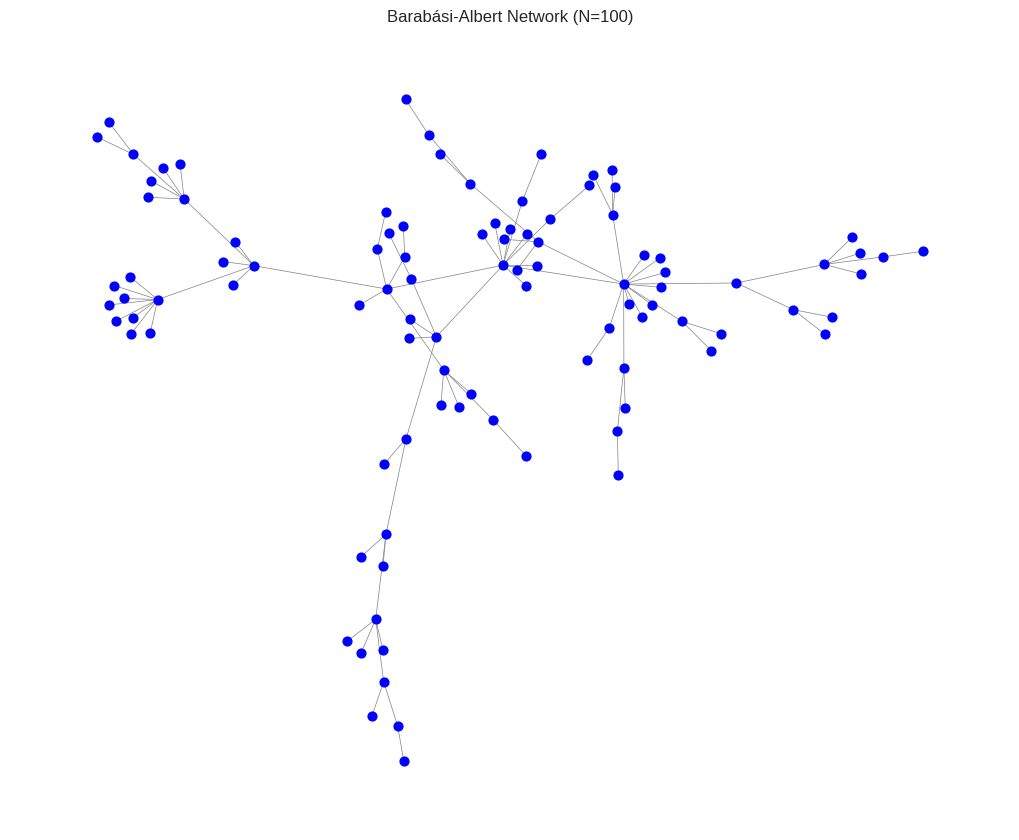

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Part 1: Build a 100-node network

# 1. First create a graph consisting of a single link.
G = nx.Graph()
G.add_edge(0, 1)

# The list of nodes to select from for preferential attachment, initialized from the starting graph
node_list_for_attachment = [0, 1]

# 2. & 3. Adding nodes until we have a 100-node network
for new_node in range(2, 100):
    # Selecting a target node based on preferential attachment, in proportion to their degree
    target_node = random.choice(node_list_for_attachment)

    # Adding the new node and connect it to the chosen target
    G.add_edge(new_node, target_node)

    # Updating the attachment list with the two nodes from the new edge
    node_list_for_attachment.extend([new_node, target_node])

# 4. Plot the 100-node network
print("Plotting the 100-node BA network...")
plt.figure(figsize=(10, 8))
# Spring layout for visualization.
pos = nx.spring_layout(G, iterations=100)
nx.draw(G, pos, with_labels=False, node_size=40, width=0.5, node_color='blue', edge_color='gray')
plt.title("Barabási-Albert Network (N=100)")
plt.show()

**Figure 2:** A visualization of the generated Barabási-Albert (BA) network with 100 nodes. The structure, created via preferential attachment, clearly shows the emergence of high-degree "hubs" characteristic of scale-free networks.


Expanding network to 5000 nodes...
Network expansion complete.

Analysis of the 5000-node network:
  Maximum Degree: 113
  Minimum Degree: 1

Plotting degree distributions...


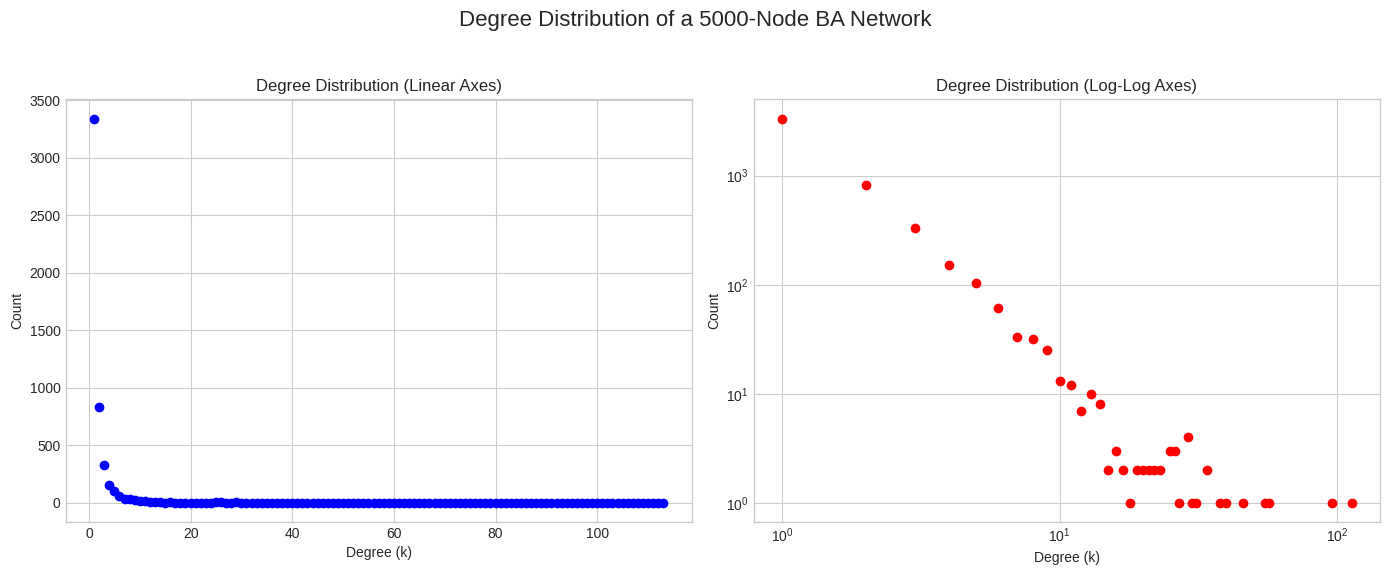

In [4]:
# Part 2: Scale up and analyze a 5000-node network

# 5. Add more nodes until we have a 5000 node network
# Continuing from the 100-node graph
print("\nExpanding network to 5000 nodes...")
for new_node in range(100, 5000):
    target_node = random.choice(node_list_for_attachment)
    G.add_edge(new_node, target_node)
    node_list_for_attachment.extend([new_node, target_node])
print("Network expansion complete.")

# 6. What's the maximum and minimum degree?
# Creating a list of all node degrees in the final graph
degrees = [d for n, d in G.degree()]
max_degree = np.max(degrees)
min_degree = np.min(degrees)

print(f"\nAnalysis of the 5000-node network:")
print(f"  Maximum Degree: {max_degree}")
print(f"  Minimum Degree: {min_degree}")

# 7. Bin the degree distribution using numpy.histogram.
# Creating bins for each integer degree value from min to max
counts, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2))
bin_centers = bin_edges[:-1]

# 8. Plot the distribution with both linear and log-log axes
print("\nPlotting degree distributions...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear plot
ax1.plot(bin_centers, counts, 'o', color='b')
ax1.set_title("Degree Distribution (Linear Axes)")
ax1.set_xlabel("Degree (k)")
ax1.set_ylabel("Count")
ax1.grid(True)

# Log-log plot
ax2.loglog(bin_centers, counts, 'o', color='r')
ax2.set_title("Degree Distribution (Log-Log Axes)")
ax2.set_xlabel("Degree (k)")
ax2.set_ylabel("Count")
ax2.grid(True)

plt.suptitle("Degree Distribution of a 5000-Node BA Network", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Figure 3:** The degree distribution of the 5000-node BA network. The linear plot (left) shows a highly skewed distribution, while the log-log plot (right) reveals a linear trend, which is the signature of a power-law distribution common to scale-free networks.

# Assignment 1.2: Stats and visualization of the Rock Music Network

This notebook analyzes a network of rock musicians constructed from Wikipedia data. The analysis covers the network's structural properties, identifies key performers, and explores methods for its visualization.

The following code downloads the Wkikpedia data and creates a graph (We have hidden the code - as it not directly part of the assignment)


In [ ]:
# FINAL SCRIPT FOR PART 1 (with reference cleaning, solved AllMusic artist))

import re
import urllib.request
import urllib.parse
import json
import os
import time

# Define the header for API requests and the regex for links
WIKI_HEADERS = {"User-Agent": "SocialGraphsCourse/1.0 (DTU/02805; example@example.com)"}
wikilink_regex = r'\[\[([^|\]<]+)'

# Get the wikitext from the list page
baseurl = "https://en.wikipedia.org/w/api.php?"
params = {
    "action": "query",
    "titles": "List_of_mainstream_rock_performers",
    "prop": "revisions",
    "rvprop": "content",
    "format": "json"
}
query_url = baseurl + urllib.parse.urlencode(params)

print("Downloading and Parsing the Main Artist List")
artist_names = [] # Initialize empty list

try:
    req = urllib.request.Request(query_url, headers=WIKI_HEADERS)
    response = urllib.request.urlopen(req, timeout=15)
    wiki_source = response.read()
    wiki_json = json.loads(wiki_source)

    pages = wiki_json['query']['pages']
    page_id = next(iter(pages))
    wikitext = pages[page_id]['revisions'][0]['*']

    # Isolate main block of artist lists
    match = re.search(r'(==\s*0-9\s*==.*?)==\s*References\s*==', wikitext, re.DOTALL)

    if match:
        artist_block = match.group(1)

        # Cleaning: Remove all <ref>...</ref> tags and their content before finding links
        cleaned_block = re.sub(r'<ref.*?</ref>', '', artist_block, flags=re.DOTALL)

        # Extract links only from the cleaned block
        artist_names = sorted(list(set(re.findall(wikilink_regex, cleaned_block))))

        print(f"\nSuccessfully extracted {len(artist_names)} unique artist names from the structured list.")
        print(f"Example artists: {artist_names[:10]}")
    else:
        print("\nERROR: Could not find the main artist block on the page.")
        raise ValueError("Main content block not found.")

except Exception as e:
    print(f"\nAn error occurred during extraction: {e}")
    artist_names = ["The Beatles", "The Rolling Stones", "AC/DC"] # To precent crash

# Download function
def download_artist_wikitext(artist_title):
    params = {
        "action": "query", "titles": artist_title, "prop": "revisions",
        "rvprop": "content", "format": "json", "redirects": 1
    }
    query_url = baseurl + urllib.parse.urlencode(params)
    try:
        req = urllib.request.Request(query_url, headers=WIKI_HEADERS)
        response = urllib.request.urlopen(req, timeout=10)
        source = response.read()
        data = json.loads(source)
        pages = data['query']['pages']
        page_id = next(iter(pages))
        if 'missing' in pages[page_id]: return None
        return pages[page_id]['revisions'][0]['*']
    except Exception as e:
        return f"ERROR: {e}"

# Loop and download
output_dir = "rock_artist_pages_final"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"\n--- Saving final artist pages to '{output_dir}' ---")
final_artist_list_after_download = []

for i, artist in enumerate(artist_names):
    safe_filename = artist.replace(" ", "_").replace("/", "_") + ".txt"
    filepath = os.path.join(output_dir, safe_filename)

    if os.path.exists(filepath) and os.path.getsize(filepath) > 100:
        print(f"Skipping ({i+1}/{len(artist_names)}): {artist} (already exists)")
        final_artist_list_after_download.append(artist)
        continue

    print(f"Downloading ({i+1}/{len(artist_names)}): {artist}...")
    time.sleep(0.5)
    content = download_artist_wikitext(artist)

    if content and not content.startswith("ERROR:"):
        with open(filepath, "w", encoding="utf-8") as f:
            f.write(content)
        final_artist_list_after_download.append(artist)
    else:
        print(f"  - FAILED or page missing for '{artist}'")

# Save the final, clean list for part 2
final_list_path = "final_artist_list_clean.txt"
with open(final_list_path, "w", encoding="utf-8") as f:
    for artist_name in sorted(final_artist_list_after_download):
        f.write(artist_name + "\n")

print("\n-----------------------------------------------------")
print("Download process complete.")
print(f"A total of {len(os.listdir(output_dir))} artist pages were saved.")
print(f"A clean list of {len(final_artist_list_after_download)} artist names has been saved to '{final_list_path}'.")

In [ ]:
# Step 1: Create the graph and add nodes

G = nx.DiGraph()
artist_set = set(artist_names)

for artist in artist_names:
    G.add_node(artist)

# Step 2: Read files and add edges
print("Reading downloaded files to build the network...")
word_counts = {}

for artist_from in artist_names:
    safe_filename = artist_from.replace(" ", "_").replace("/", "_") + ".txt"
    filepath = os.path.join(output_dir, safe_filename)

    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            content = f.read()
            word_counts[artist_from] = len(content.split())

            outgoing_links = re.findall(wikilink_regex, content)

            for artist_to in outgoing_links:
                if artist_to in artist_set and artist_to != artist_from:
                    G.add_edge(artist_from, artist_to)
    except FileNotFoundError:
        word_counts[artist_from] = 0
        continue

nx.set_node_attributes(G, word_counts, 'word_count')
print("Initial network built successfully.")

---

## **1.  Network Construction Process**

This section outlines how we collected data and built the network, as detailed in the exercises for Week 4. For efficiency (and helping you out with the grading process), the final analysis notebook loads a pre-built version of the network, so the data collection script is not executed here.

*   **Explain your process in words**

*Answer:*

**Document how you crawled the network.**

1.  **First, simply describe the steps of the process (what you did, step by step):** First, we had to get the artist list. The script gets the source code of the Wikipedia page "List of mainstream rock performers". To get a clean list of artists, the focus is only on the main section where the performers are listed. A key step was to first remove all the citation text, like [1], [2], etc., so that the script wouldn't accidentally grab non-artist links from the references. After cleaning the text, we used a regular expression to extract the 488 unique artist names.
With this clean list, the script then downloads the individual Wikipedia page for each of the 488 artists and saves them as local text files. Using the NetworkX library, we created a directed graph. For each of the saved artist files, the code searches for links to any of the other artists on the list, and if a link is found, a directed connection (edge) is created from the artist whose page it was to the artist they link to.
The code also counts the number of words on each artist's page and saves it as a feature of that node. Finally, one artist was removed (Dr. Hook & the Medicine Show) as it is an isolate (has no connections to anyone else), and the largest connected component of the network was selected for further use to ensure the analysis is done on a single, connected graph.

2.  **Then, write a short section about which part of the process that was most difficult:** The hardest part was by far the data collection and cleaning. At first, the script was picking up non-artists like "AllMusic" from inside the citation tags. Therefore, we had to clean out all the reference tags before extracting the artist links. Also, simple network problems meant that the script would freeze while downloading, so for that issue, we had to add a timeout and a way to restart it so it could pick up where it left off, without starting all over again.

3.  **Next write a short section about how you used LLMs to help you:** LLMs were used as coding assistance - mostly for syntax and debugging after the main logic had been drafted, because some library features wouldn't behave as expected. All text and explanations have been written using natural intelligence. :D

4.  **Finally, compose a short section about what you would do differently if you had to do it again:** If we were to do this again, the smartest way of working would probably be to have separate notebooks: one for downloading/cleaning with a single output (the network file) and another notebook for simply loading the final network and doing analysis/visualization.

---

### **2. Network Statistics and Analysis**

This section loads the pre-built rock music network and performs a statistical analysis to understand its properties.

#### **Loading the Network**

First, we load the largest connected component of the network from a GML file.


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Load the pre-built network from GitHub URL
print("--- Loading the Rock Music Network ---")
graph_url = "https://raw.githubusercontent.com/frederikbajhenriksen/SocialGraphsFall25/main/rock_music_network.gml"
local_filename = "rock_music_network.gml"

# Initialize an empty graph object
G = nx.DiGraph()

try:
    # Download and read the GML file
    urllib.request.urlretrieve(graph_url, local_filename)
    G = nx.read_gml(local_filename, label='label')
    print("Successfully loaded the graph.")
except Exception as e:
    print(f"ERROR: Could not load the graph: {e}")

--- Loading the Rock Music Network ---
Successfully loaded the graph.




#### **Exercise: Simple network statistics and analysis**

*   **What is the number of nodes in the network? More importantly, what is the number of links?**

*Answer:*

The code below calculates the number of nodes and edges in the loaded graph.


In [9]:
if G.number_of_nodes() > 0:
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    print(f"--- Final Network Statistics ---")
    print(f"Number of nodes (performers): {num_nodes}")
    print(f"Number of links (connections): {num_edges}")
else:
    print("Analysis skipped because the network is empty.")

--- Final Network Statistics ---
Number of nodes (performers): 487
Number of links (connections): 7373


The final network, representing the largest connected component, consists of 487 nodes (performers) and 7,373 directed edges (links).

* **Plot the in- and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**

*Answer:*
The in-degree and out-degree distributions are plotted below on a log-log scale to visualize their characteristics.

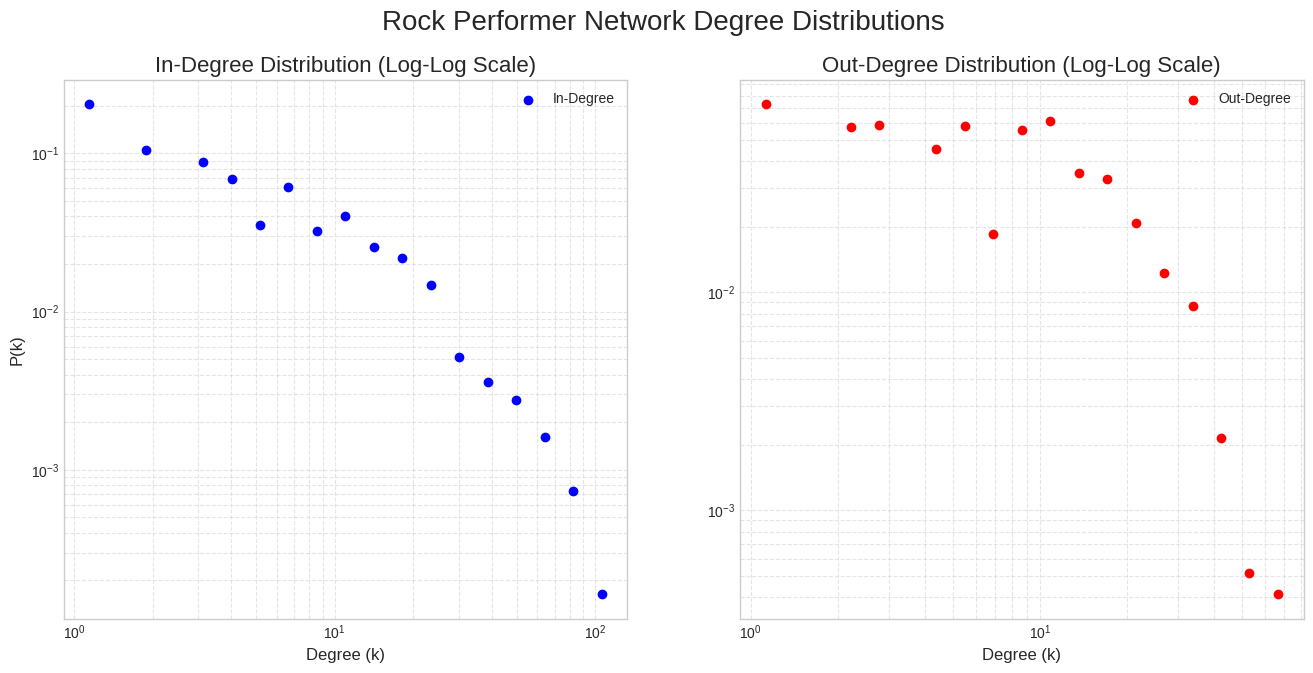

In [10]:
# Calculate in- and out-degrees
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

# Function for log-binning the degree distribution
def log_bin_distribution(degrees):
    if not degrees or max(degrees) == 0: return [], []
    max_degree = max(degrees)
    # Ensure the first bin starts at 1
    bins = np.logspace(np.log10(1), np.log10(max_degree), num=20)
    counts, bin_edges = np.histogram(degrees, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Filter out empty bins
    non_zero = counts > 0
    return bin_centers[non_zero], counts[non_zero]

# Get binned data
in_bins, in_counts = log_bin_distribution(in_degrees)
out_bins, out_counts = log_bin_distribution(out_degrees)

# Create the plot
plt.figure(figsize=(16, 7))

# In-degree Plot
plt.subplot(1, 2, 1)
plt.scatter(in_bins, in_counts, c='blue', label='In-Degree')
plt.title('In-Degree Distribution (Log-Log Scale)', fontsize=16)
plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('P(k)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()

# Out-degree Plot
plt.subplot(1, 2, 2)
plt.scatter(out_bins, out_counts, c='red', label='Out-Degree')
plt.title('Out-Degree Distribution (Log-Log Scale)', fontsize=16)
plt.xlabel('Degree (k)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()

plt.suptitle("Rock Performer Network Degree Distributions", fontsize=20)
plt.show()

**Figure 4: In-degree and out-degree distributions of the Rock Music Network.** The plots are shown on a log-log scale. The in-degree distribution (left) exhibits a linear trend, characteristic of a power-law, while the out-degree distribution (right) is more peaked and falls off faster.

**Observations:**

*   **The in-degree distribution** shows a clear and distinct pattern. On the log-log plot, the points form a roghly straight line with a downwards slope. This is the classic look of a scale-free network. This indicates that the distribution of incoming links is highly skewed. That is, the majority of performers have a very small number of incoming links (the cluster of points at the top left of the plot), while a small number of "hub" performers have an exceptionally high number of incoming links (the long tail to lower right). This is the power-lav structure that we would expect from such a network. A few legendary artists (the hubs) are referenced on many other pages, while most artists are only mentioned by a few, probably contemporaries.

*   **The out-degree distribution** has a noticeably different shape. It is much more scattered and does not follow a clean power-law line. The distribution is peaked around a degree of 4-5 and then drops off much more quikly than the in-degree distribution. It is still broader than what we would expect from a purely random network, but it lacks the "long tail" of the in-degree plot.

**Explanation of the Difference:**

The two distributions are different because they measure different phenomena. In-degree esentially measures popularity, which has no theoretical limit - i.e. a performer can be cited by any number of other pages. Out-degree however reflects on the choice of the editor of the article/page. An editor will usually have a reasonable upper limit on how many other artists to reference inside a single page, making this number much more naturally constrained.

*   **Who are the top 5 most connected performers (Report results for in-degrees and out-degrees)? Comment on your findings.**

*Answer:*

The top 5 performers based on in-degree (most referenced) and out-degree (most references to others) are calculated below.


In [11]:

# Sort nodes by in-degree
in_degree_sorted = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
print("--- Top 5 Performers by In-Degree (Influence) ---")
for i, (artist, degree) in enumerate(in_degree_sorted[:5]):
    print(f"{i+1}. {artist}: {degree} incoming links")

# Sort nodes by out-degree
out_degree_sorted = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
print("\n--- Top 5 Performers by Out-Degree (Prolific Linkers) ---")
for i, (artist, degree) in enumerate(out_degree_sorted[:5]):
    print(f"{i+1}. {artist}: {degree} outgoing links")


--- Top 5 Performers by In-Degree (Influence) ---
1. Led Zeppelin: 119 incoming links
2. Bob Dylan: 95 incoming links
3. Queen (band): 88 incoming links
4. Metallica: 85 incoming links
5. David Bowie: 84 incoming links

--- Top 5 Performers by Out-Degree (Prolific Linkers) ---
1. Alice in Chains: 74 outgoing links
2. Deep Purple: 71 outgoing links
3. Black Sabbath: 60 outgoing links
4. Def Leppard: 52 outgoing links
5. Bryan Adams: 51 outgoing links


**Findings:**

*   **Top 5 by Out-Degree (Prolific Linkers):** The list of performers with the highest out-degree is different and reveals another aspect of the network. The top performers by this metric are Alice in Chains, Deep Purple, Black Sabbath, Def Leppard, and Bryan Adams. While these are all famous bands, they are not necessarily the absolute most influential. Their high out-degree suggests that their Wikipedia pages are particularly comprehensive and well-referenced, containing many links to other artists they influenced, toured with, or are otherwise related to.

*   **Top 5 by In-Degree (Influence):** The list of the top 5 most influential performers is dominated by highly famous artists: Led Zeppelin, Bob Dylan, Queen, Metallica, and David Bowie. This is entirely expected. These artists are the "hubs" that the in-degree distribution plot predicts. Their high number of incoming links reflects their central role and popularity in the rock music genre.


*   **What are the 10 pages with the longest wiki entries?**

*Answer:*

The 10 longest Wikipedia pages are identified using the `word_count` node attribute.


In [12]:
# Create a dictionary of word counts
word_counts_dict = {node: int(data.get('word_count', 0)) for node, data in G.nodes(data=True)}

# Sort the dictionary by word count in descending order
sorted_word_counts = sorted(word_counts_dict.items(), key=lambda x: x[1], reverse=True)

print("--- Top 10 Longest Wikipedia Pages (by Word Count) ---")
for i, (artist, count) in enumerate(sorted_word_counts[:10]):
    print(f"{i+1}. {artist}: {count} words")

--- Top 10 Longest Wikipedia Pages (by Word Count) ---
1. Bob Dylan: 30646 words
2. Guns N' Roses: 29711 words
3. Paul McCartney: 27322 words
4. Queen (band): 27035 words
5. The Beach Boys: 26286 words
6. The Rolling Stones: 26186 words
7. David Bowie: 24905 words
8. Elton John: 24904 words
9. U2: 24877 words
10. Elvis Presley: 24689 words


**Findings:**

The list of the 10 pages with the highest word count includes many of the same artists who are also highly influential (high in-degree), such as Bob Dylan, Queen, and David Bowie. This shows a strong correlation between an artists significance in the network and the amount of information documented about them (at least on wikipedia). The most central and influential rock musicians in rock history are naturally the ones with the the most extensive and detailed Wikipedia articles.



---

### **3. Network Visualization**

*   **Let's build a simple visualization of the network**

*Answer:*

The following code generates a visualization of the network. To simplify the layout process for a dense graph, we visualize its undirected version. Node size is mapped to total degree, and node color is mapped to the word count of the artist's page.


Calculating layout...


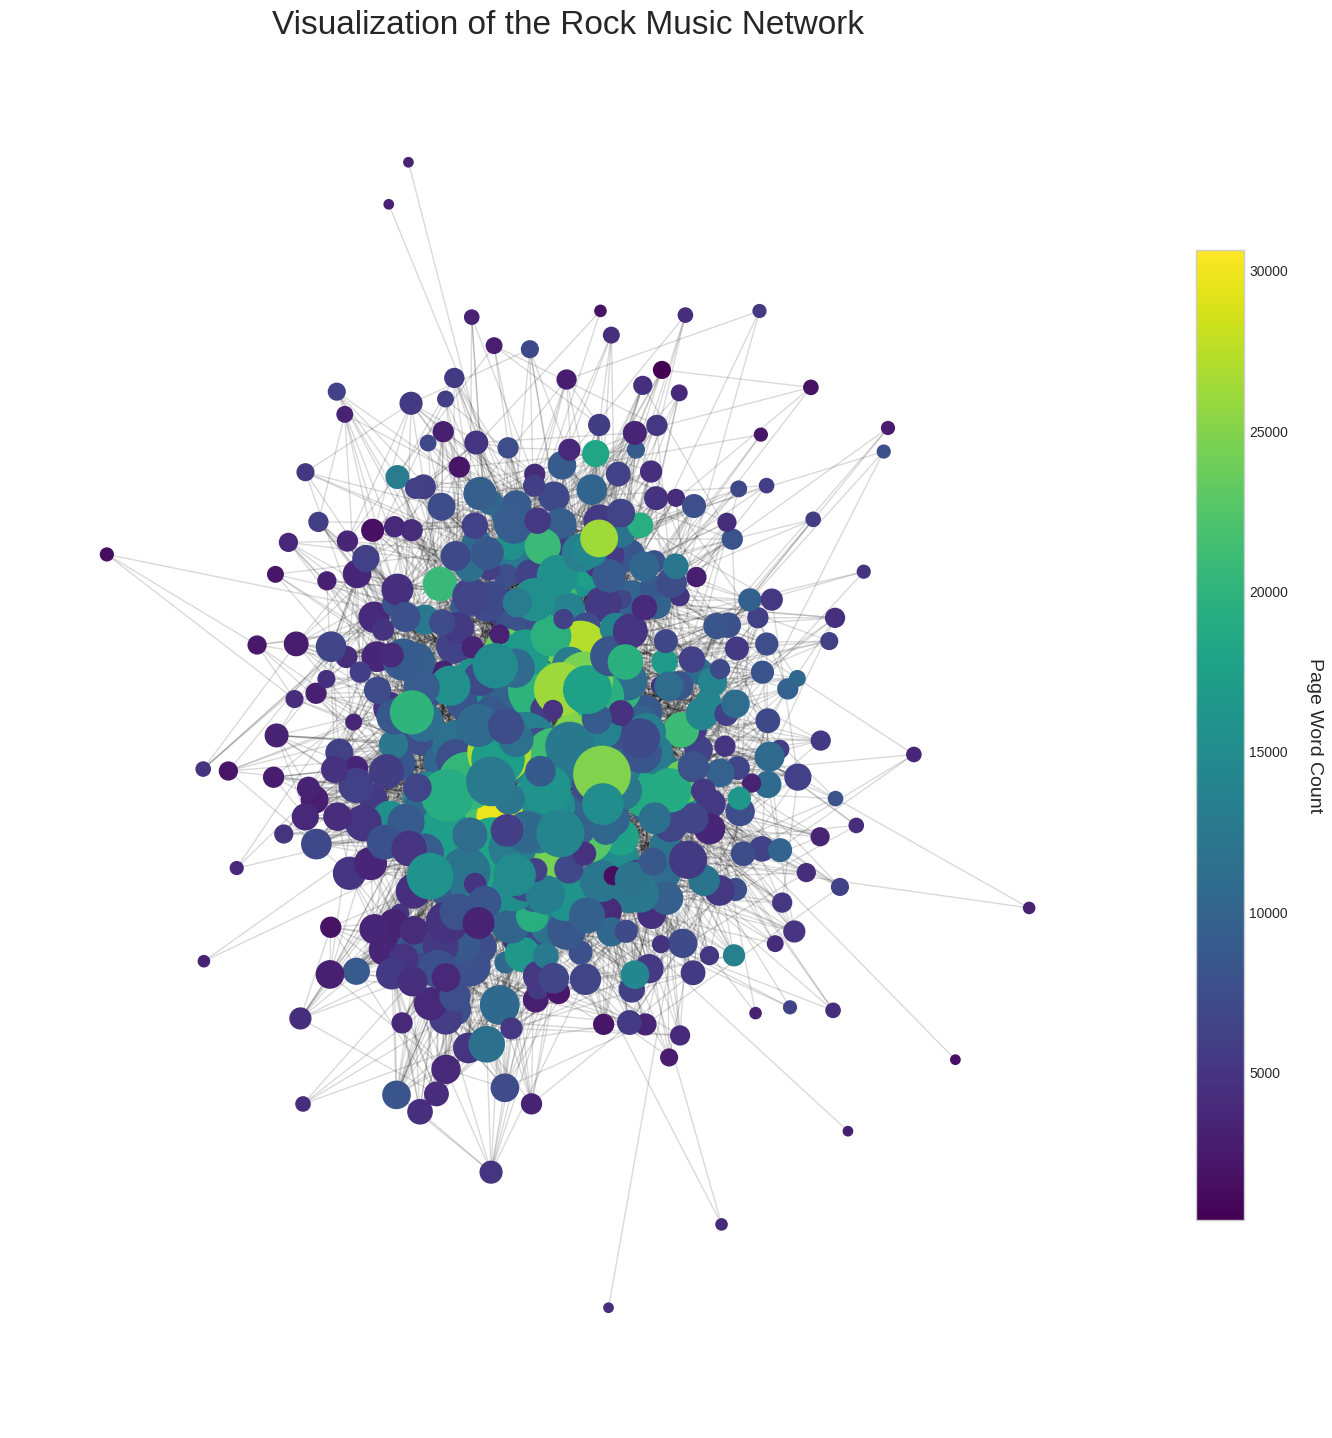

In [13]:
# We use the graph 'G' loaded in Part 2

# Convert to undirected
G_undirected = G.to_undirected()

print("Calculating layout...")
pos = nx.spring_layout(G_undirected, seed=42, k=0.3, iterations=50)

# Node size is proportional to total degree in the undirected graph
degrees = [val for (node, val) in G_undirected.degree()]
node_sizes = [d * 20 + 25 for d in degrees]

# Node color is based on the word count from the original directed graph
node_colors = [G.nodes[node]['word_count'] for node in G_undirected.nodes()]

# Create the plot
plt.figure(figsize=(18, 18))

nx.draw_networkx_edges(G_undirected, pos, alpha=0.15)

nodes = nx.draw_networkx_nodes(G_undirected, pos,
                               node_color=node_colors,
                               node_size=node_sizes,
                               cmap=plt.cm.viridis)

# Add a colorbar to explain the color mapping
cbar = plt.colorbar(nodes, shrink=0.7)
cbar.set_label('Page Word Count', rotation=270, labelpad=25, fontsize=14)

plt.title("Visualization of the Rock Music Network", fontsize=24)
plt.axis('off')
plt.show()

**Figure 5: Visualization of the Rock Music Network.** Node size corresponds to the total degree (in- + out-degree). Node color corresponds to the word count of the artist's Wikipedia page (brighter colors indicate longer pages).


The graph is the hairiest of hairballs, so it is quite hard to get anything meaningful out of it. We can see the variety in node degrees and length of content, but otherwise it brings no real information or insight. But at least the code runs :D

---

### **Contributions**


* Assignment 1.1 - Jacob, Olivia

* Assignment 1.2 - Frederik, Olivia

All work has been done in collaboration, but the rough division of intial work was that Jacob and Frederik drafted code for parts 1 and 2 respectively, while Olivia answered explanatory questions. When first drafts were done, the group went over all sections, and gave feedback/corrected iteratively.

### **LLM Usage Statement**

Large Language Models (e.g., ChatGPT, GitHub Copilot) were utilized as coding assistants for tasks such as syntax correction, debugging, and exploring `matplotlib` library features. The core logic of the analysis and all written explanations and interpretations were developed by the group members. We used generative AI tools, similar to Grammarly, solely to improve the language and clarity of the text. All content and
ideas were created entirely by the authors.

### **References**
 Barabási, A.-L. (2016). *Network Science*. Cambridge University Press. Also available online at [http://networksciencebook.com](http://networksciencebook.com).

 Barabási, A.-L., & Albert, R. (1999). Emergence of scaling in random networks. *Science*, *286*(5439), 509–512.

 Albert, R., & Barabási, A.-L. (2002). Statistical mechanics of complex networks. *Reviews of Modern Physics*, *74*(1), 47–97.